In [ ]:
import pandas as pd
import numpy as np
from google.colab.data_table import DataTable
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
DataTable.max_columns = 50 # It increase the tendency of google colab to tae upto 50 columns.

In [ ]:
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### EDA Visualization

In [ ]:
df_visualize = df.copy()

In [ ]:
df_visualize.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

The heatmap is not working because the variable is in categories so i have to replace it with numerical so that the corelation between the attributes can be visualize. So, for heatmap i'm going to make new dataframe.

In [ ]:
df_visualize.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
df_visualize['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
df_visualize['Level'].replace('Low',0,inplace = True)
df_visualize['Level'].replace('Medium',5,inplace = True)
df_visualize['Level'].replace('High',10,inplace = True)

In [ ]:
df_visualize.head(3)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,5
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,10


Heatmap is the best way to find which features are more related to target variable. It find the coorelation of independent variables with the target variable which is 'Level'.

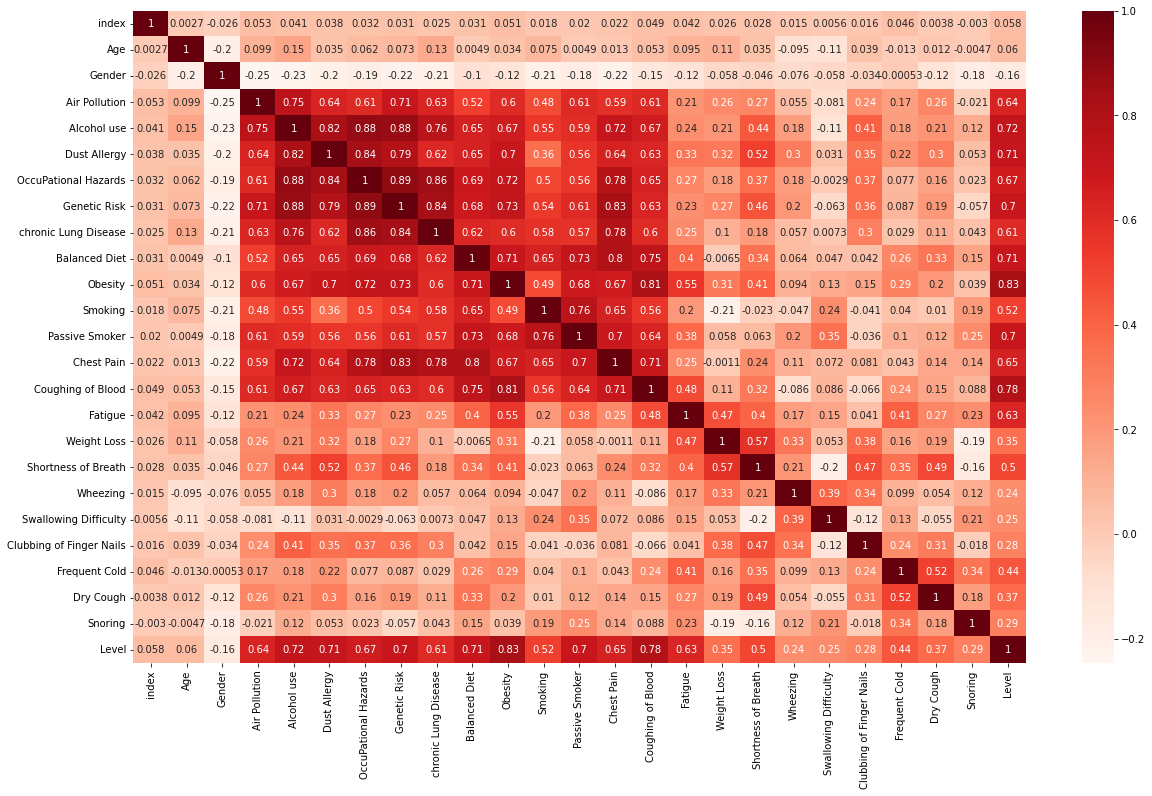

In [ ]:
plt.figure(figsize=(20,12))   
cor = df_visualize.corr()     
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In the heatmap the value close to 1 show high strong high corelation. Similarly, values close to 0 show weak coorelation.  We select those features which has coorelation more than 0.5.

In [ ]:
cor_target = abs(cor['Level'])

relevant_features = cor_target[cor_target>0.5]
relevant_features

Air Pollution           0.636038
Alcohol use             0.718710
Dust Allergy            0.713839
OccuPational Hazards    0.673255
Genetic Risk            0.701303
chronic Lung Disease    0.609971
Balanced Diet           0.706273
Obesity                 0.827435
Smoking                 0.519530
Passive Smoker          0.703594
Chest Pain              0.645461
Coughing of Blood       0.782092
Fatigue                 0.625114
Level                   1.000000
Name: Level, dtype: float64

Now, we can see that the above features are corelated with target valriable 'Level'. It means we can select these attributes as features and delete rest of them. Now, the thing is that the selected features can also high corelated with each other but we have to select those independent variables or features that are uncorelaed with each other.
Therefore, now i will check the corelation between the selected features.

In [ ]:
print(df_visualize[['Air Pollution','Alcohol use']].corr())
print(df_visualize[['Air Pollution', 'Dust Allergy']].corr())
print(df_visualize[['Air Pollution','OccuPational Hazards']].corr())
print(df_visualize[['Air Pollution','Genetic Risk']].corr())
print(df_visualize[['Air Pollution','chronic Lung Disease']].corr())
print(df_visualize[['Air Pollution','Balanced Diet']].corr())
print(df_visualize[['Air Pollution','Obesity']].corr())
print(df_visualize[['Air Pollution','Smoking']].corr())
print(df_visualize[['Air Pollution','Chest Pain']].corr())
print(df_visualize[['Air Pollution','Coughing of Blood']].corr())
print(df_visualize[['Air Pollution','Fatigue']].corr())


               Air Pollution  Alcohol use
Air Pollution       1.000000     0.747293
Alcohol use         0.747293     1.000000
               Air Pollution  Dust Allergy
Air Pollution       1.000000      0.637503
Dust Allergy        0.637503      1.000000
                      Air Pollution  OccuPational Hazards
Air Pollution              1.000000              0.608924
OccuPational Hazards       0.608924              1.000000
               Air Pollution  Genetic Risk
Air Pollution       1.000000      0.705276
Genetic Risk        0.705276      1.000000
                      Air Pollution  chronic Lung Disease
Air Pollution              1.000000              0.626701
chronic Lung Disease       0.626701              1.000000
               Air Pollution  Balanced Diet
Air Pollution       1.000000       0.524873
Balanced Diet       0.524873       1.000000
               Air Pollution   Obesity
Air Pollution       1.000000  0.601468
Obesity             0.601468  1.000000
               Air 

So, from the above coorelation we get the idea that the featues that we selected before doesn't have strong relation with each other. So, we can keep all the features(that we selected) which are [Air Pollution,Alcohol use, Dust Allergy, OccuPational Hazards,GeneticRisk,          chronic Lung Disease, Balanced Diet,Obesity, Smoking, PassiveSmoker,   Chest Pain, Coughing of Blood,
Fatigue]. However, when i did research on internet i found that the rest of features that has weak corelation also has a reasons of lung cancer. Although these features put less impacts but these are important.

##### Now i draw countplot to see which gender (1 represent male and 2 represent female) has more rate of lung cancer level (0 represent low, 5 represent medium, 10 represent high.

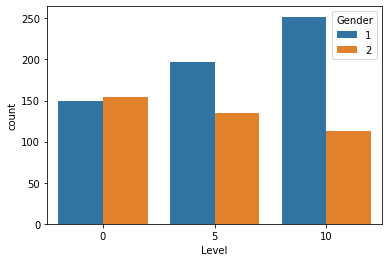

In [ ]:
sns.countplot(x = 'Level', hue = 'Gender',data = df_visualize)

In [ ]:
df_visualize['Gender'].value_counts()

1    598
2    402
Name: Gender, dtype: int64

Talking about the bias in the dataset, the male has the more number of records. Therefore, it may happen that the model predict result by comparing the new datapoints with male.

##### Now, i will plot another graph to see at what age people have more number of lung cancer

<Figure size 504x864 with 0 Axes>

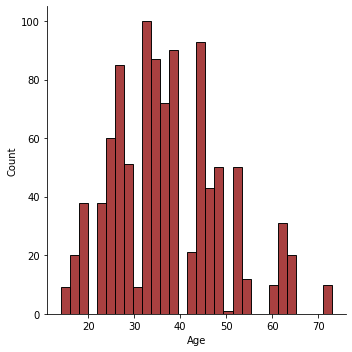

In [ ]:
plt.figure(figsize = (7,12))
sns.displot(df_visualize['Age'].dropna(),kde=False,color ='darkred',bins =30)

Between the age of 30 and 40 people have more number of lung cancer.

## Data Cleaning

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.dropna()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df_clean = df_clean.drop(columns=['Weight Loss']) # Weight loss is not the reson, it is impact on patient after having ling cancer.
df_clean = df_clean.drop(columns=['index'])

In [ ]:
df_clean.sort_values(by='Patient Id', inplace=True)

### In case of K neighbour classifier, the Level (target variable) should be in categories 

In [ ]:
Level_type = pd.CategoricalDtype(categories = ['Low',  'Medium','High'])
df_clean['Level'] = df_clean['Level'].astype(Level_type)
df_clean.dtypes

Patient Id                    object
Age                            int64
Gender                         int64
Air Pollution                  int64
Alcohol use                    int64
Dust Allergy                   int64
OccuPational Hazards           int64
Genetic Risk                   int64
chronic Lung Disease           int64
Balanced Diet                  int64
Obesity                        int64
Smoking                        int64
Passive Smoker                 int64
Chest Pain                     int64
Coughing of Blood              int64
Fatigue                        int64
Shortness of Breath            int64
Wheezing                       int64
Swallowing Difficulty          int64
Clubbing of Finger Nails       int64
Frequent Cold                  int64
Dry Cough                      int64
Snoring                        int64
Level                       category
dtype: object

In [ ]:
Gender_type = pd.CategoricalDtype(categories = [1 , 2])
df_clean['Gender'] = df_clean['Gender'].astype(Gender_type)
df_clean.dtypes

Patient Id                    object
Age                            int64
Gender                      category
Air Pollution                  int64
Alcohol use                    int64
Dust Allergy                   int64
OccuPational Hazards           int64
Genetic Risk                   int64
chronic Lung Disease           int64
Balanced Diet                  int64
Obesity                        int64
Smoking                        int64
Passive Smoker                 int64
Chest Pain                     int64
Coughing of Blood              int64
Fatigue                        int64
Shortness of Breath            int64
Wheezing                       int64
Swallowing Difficulty          int64
Clubbing of Finger Nails       int64
Frequent Cold                  int64
Dry Cough                      int64
Snoring                        int64
Level                       category
dtype: object

In [ ]:
df_clean.shape

(1000, 24)

In [ ]:
duplicate_rows = df_clean.duplicated()   
df_clean = df_clean[~duplicate_rows]
df_clean.shape

(1000, 24)

Now, i'm going to drop the patient id column. And the reason is that if i drop it before dropping duplicate rows then the huge amount of data lost.

In [ ]:
df_clean = df_clean.drop(columns=['Patient Id'])
df_clean.shape

(1000, 23)

In [ ]:
df = df_clean

### Splitting of dataset

In [ ]:
y = df['Level']


In [ ]:
X = df.iloc[:, 0:22]
X


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Chest Pain,Coughing of Blood,Fatigue,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,2,4,3,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,2,3,1,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,4,8,8,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,7,8,4,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,7,9,3,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,7,5,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,7,9,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,4,8,8,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,7,9,3,4,1,4,2,4,2,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##### Instantiate KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeigh_clf = KNeighborsClassifier(n_neighbors = 15)

Fit the data in algorithm

In [ ]:
KNeigh_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = KNeigh_clf.predict(X_test)

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9466666666666667

Checking overfitting

In [ ]:
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 KNeigh_clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 2))

Train accuracy: 0.95
Test accuracy: 0.95


k fold crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
k_range = list(range(1, 31))
k_scores = []
for i in k_range:
  knn = KNeighborsClassifier(n_neighbors= i)
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())
print(k_scores)  

[0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.9969999999999999, 0.9969999999999999, 0.982, 0.9730000000000001, 0.9419999999999998, 0.922, 0.9179999999999999, 0.922, 0.925, 0.9269999999999999, 0.9269999999999999, 0.9269999999999999, 0.923, 0.9279999999999999, 0.93, 0.93, 0.93]


Text(0, 0.5, 'Cross-Validated Accuracy')

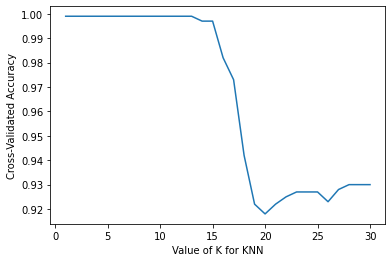

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Estimate the Level of cancer of new patient.

In [ ]:
s = pd.Series([35,2,4,5,6,5,6,5,5,5,6,6,6,4,1,3,2,4,6,2,4,1])
s_prediction = KNeigh_clf.predict(s.values.reshape(1,-1))
s_prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Medium'], dtype=object)

In [ ]:
k = pd.Series([72,1,1,1,1,1,1,1,5,1,1,1,1,1,3,1,1,1,2,1,1,1])
k_prediction = KNeigh_clf.predict(k.values.reshape(1,-1))
k_prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Low'], dtype=object)

In [ ]:
j = pd.Series([34,5,7,8,9,3,5,7,5,8,3,6,8,2,5,8,9,2,9,8,8,9])
j_prediction = KNeigh_clf.predict(j.values.reshape(1,-1))
j_prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['High'], dtype=object)